In [2]:
import numpy as np
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/intro_cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [3]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


## Definindo se um imóvel está à venda ou para locação a partir do preço

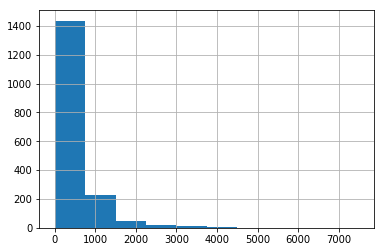

In [8]:
(houses['price']/1000).hist()

In [0]:
houses['log_price'] = houses['price'].apply(np.log10)

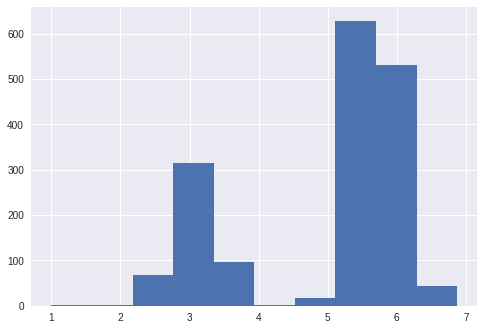

In [4]:
houses[houses['log_price'] > 0]['log_price'].hist()

In [0]:
houses['operation'] = 'sell'

In [0]:
houses.loc[(houses['price'] > 100) & (houses['price'] < 30000),'operation'] = 'rent'

In [7]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,log_price,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,3.176091,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,5.518514,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,5.406540,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,5.579784,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,5.477121,sell


Exercícios:

1. Calcule o preço do metro quadrado de venda e aluguel para Recife
2. Calcule o preço do metro quadrado de venda para apartamentos e casas
3. Calcule a área média de venda para apartamentos e casas
4. Encontre os bairros com maior e menor valor de venda do metro quadrado
5. Calcule a média e mediana de venda do metro quadrado por bairros (dica: usar groupby)
6. Calcule a média do metro quadrado em apartamentos de no máximo 3 quartos no bairro Espinheiro
7. Encontre os bairros com a menor e maior mediana de área

In [18]:
houses['price_square_meter'] = houses['price']/houses['area']

In [19]:
houses[(houses.type == 'apart') & (houses.bedrooms <= 3) & (houses.suburb == 'Espinheiro')].price_square_meter.mean()

4033.597020052011

In [20]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

KeyError: 'operation'

In [17]:
houses[houses['operation']=='sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

KeyError: 'operation'

## Medianas do valor de venda por metro quadrado para cada bairro

In [16]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar()

KeyError: 'operation'

In [13]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,log_price,price_square_meter
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,10.000000,11.000000,7.0,13.000000,13.000000
mean,1.193943e+06,-8.055494,-34.893257,3.230769,213.623846,1.700000,3.090909,1.0,5.828279,9607.917369
std,1.868665e+06,0.000952,0.002665,1.012739,442.405253,0.823273,0.301511,0.0,0.410753,14132.119159
min,2.500000e+05,-8.056280,-34.895347,1.000000,40.110000,0.000000,3.000000,1.0,5.397940,1948.694030
25%,3.650000e+05,-8.055979,-34.895347,3.000000,51.000000,1.250000,3.000000,1.0,5.562293,5391.304348
50%,6.200000e+05,-8.055979,-34.895347,3.000000,115.000000,2.000000,3.000000,1.0,5.792392,6000.000000
75%,6.900000e+05,-8.054936,-34.890077,4.000000,115.000000,2.000000,3.000000,1.0,5.838849,6606.831214
max,7.000000e+06,-8.052734,-34.889466,5.000000,1682.000000,3.000000,4.000000,1.0,6.845098,56039.215686


In [0]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,log_price,operation,price_square_meter
179,365000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,5.562293,sell,7156.862745
182,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
231,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
400,2858000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,6.456062,sell,56039.215686
476,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
618,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
628,592139,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,5.772424,sell,11610.568627
752,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
788,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
862,261125,-8.055979,-34.895347,4.0,134.00,3.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.416848,sell,1948.694030
